<a href="https://colab.research.google.com/github/davideke1/Project_Python_2/blob/master/Spotify_analysis_2000_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gs
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Colab/songs_normalize.csv")
df.head(50)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.8940,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.6840,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.2780,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.5440,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.8790,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.7140,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.8610,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.7340,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.8690,126.041,Dance/Electronic


In [4]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [5]:
#getting the unique years in the dataset
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

In [6]:
#Dropping years that don't fall in 2000-2020
a_1=(len(df.query('year==1998')))
a_2=(len(df.query('year==1999')))
s= a_1+a_2
print("The total number of songs:",s)

The total number of songs: 39


In [7]:
df_years_drop = df[(df['year'] <2000) | (df['year'] > 2020)].index
df = df.drop(df_years_drop)

In [8]:
df.year.unique()

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017, 2014])

In [9]:
#getting the no of rows and columns
df.shape

(1961, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1961 non-null   object 
 1   song              1961 non-null   object 
 2   duration_ms       1961 non-null   int64  
 3   explicit          1961 non-null   bool   
 4   year              1961 non-null   int64  
 5   popularity        1961 non-null   int64  
 6   danceability      1961 non-null   float64
 7   energy            1961 non-null   float64
 8   key               1961 non-null   int64  
 9   loudness          1961 non-null   float64
 10  mode              1961 non-null   int64  
 11  speechiness       1961 non-null   float64
 12  acousticness      1961 non-null   float64
 13  instrumentalness  1961 non-null   float64
 14  liveness          1961 non-null   float64
 15  valence           1961 non-null   float64
 16  tempo             1961 non-null   float64


In [11]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [12]:
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [13]:
#getting the no of songs by artist in the dataset
artist = df["artist"].value_counts()
artist

Rihanna            25
Drake              23
Eminem             21
Calvin Harris      20
David Guetta       18
                   ..
Yolanda Be Cool     1
t.A.T.u.            1
Benny Benassi       1
Panjabi MC          1
Blanco Brown        1
Name: artist, Length: 822, dtype: int64

In [35]:
artist = input("Enter artist name ---> ").title()
df[df['artist'].str.contains(artist)]

Enter artist name ---> David guetta


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
903,David Guetta,Sexy Bitch (feat. Akon),195853,True,2010,75,0.813,0.627,11,-5.018,0,0.0486,0.07710,0.000616,0.1310,0.801,130.011,"hip hop, pop, Dance/Electronic"
940,David Guetta,When Love Takes Over (feat. Kelly Rowland),191000,False,2010,69,0.675,0.862,11,-4.614,1,0.0253,0.01650,0.000427,0.1690,0.498,129.967,"hip hop, pop, Dance/Electronic"
1005,David Guetta,Memories (feat. Kid Cudi),210853,False,2010,76,0.546,0.916,8,-3.932,1,0.2550,0.00144,0.000004,0.2510,0.375,129.983,"hip hop, pop, Dance/Electronic"
1012,David Guetta,Gettin' Over You (feat. Fergie & LMFAO),188000,False,2010,62,0.615,0.913,10,-5.077,0,0.0816,0.17800,0.000000,0.0773,0.450,129.944,"hip hop, pop, Dance/Electronic"
1107,David Guetta,Who's That Chick? (feat. Rihanna),201040,False,2010,71,0.675,0.602,11,-4.733,0,0.1160,0.00377,0.000000,0.0458,0.933,127.938,"hip hop, pop, Dance/Electronic"
1116,David Guetta,Where Them Girls At (feat. Nicki Minaj & Flo R...,194840,True,2012,72,0.666,0.876,3,-3.078,1,0.0414,0.05500,0.000000,0.2590,0.552,129.884,"hip hop, pop, Dance/Electronic"
1170,David Guetta,Without You (feat. Usher),208133,False,2012,70,0.608,0.614,2,-3.727,1,0.0285,0.22700,0.000004,0.1570,0.402,127.884,"hip hop, pop, Dance/Electronic"
1207,David Guetta,Turn Me On (feat. Nicki Minaj),199680,False,2012,65,0.704,0.793,8,-2.266,1,0.0591,0.04880,0.000000,0.5750,0.412,127.960,"hip hop, pop, Dance/Electronic"
1215,David Guetta,She Wolf (Falling to Pieces) [feat. Sia],222500,False,2012,66,0.492,0.857,7,-2.634,1,0.0655,0.08410,0.000008,0.3440,0.393,129.973,"hip hop, pop, Dance/Electronic"
1256,David Guetta,Titanium (feat. Sia),245040,False,2012,79,0.604,0.787,0,-3.674,0,0.1030,0.06790,0.150000,0.1270,0.301,126.062,"hip hop, pop, Dance/Electronic"


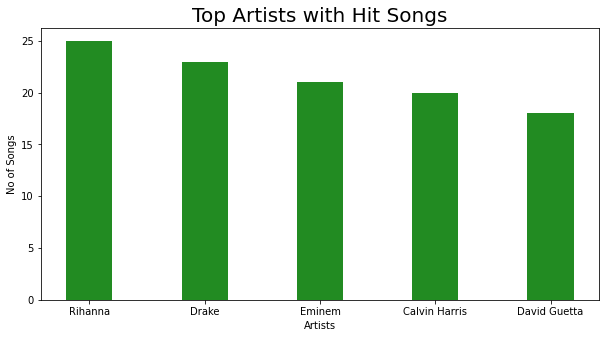

In [14]:
top_artist = artist[:5]
top_artist_name = artist[:5].index
plt.figure(figsize = (10, 5))
plt.bar(top_artist_name,top_artist,width = 0.4,color="forestgreen")
plt.xlabel("Artists")
plt.ylabel("No of Songs")
plt.title('Top Artists with Hit Songs',color = 'black',fontsize = 20)
plt.show()

In [15]:
#getting the count of different genre in th dataset
genre = df['genre'].value_counts()
genre

pop                                      417
hip hop, pop                             276
hip hop, pop, R&B                        240
pop, Dance/Electronic                    219
pop, R&B                                 173
hip hop                                  121
hip hop, pop, Dance/Electronic            78
rock                                      57
rock, pop                                 41
Dance/Electronic                          40
rock, metal                               37
pop, rock                                 26
pop, latin                                26
set()                                     21
hip hop, Dance/Electronic                 16
latin                                     15
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
pop, rock, metal                          12
country                                   10
hip hop, pop, rock                         9
metal     

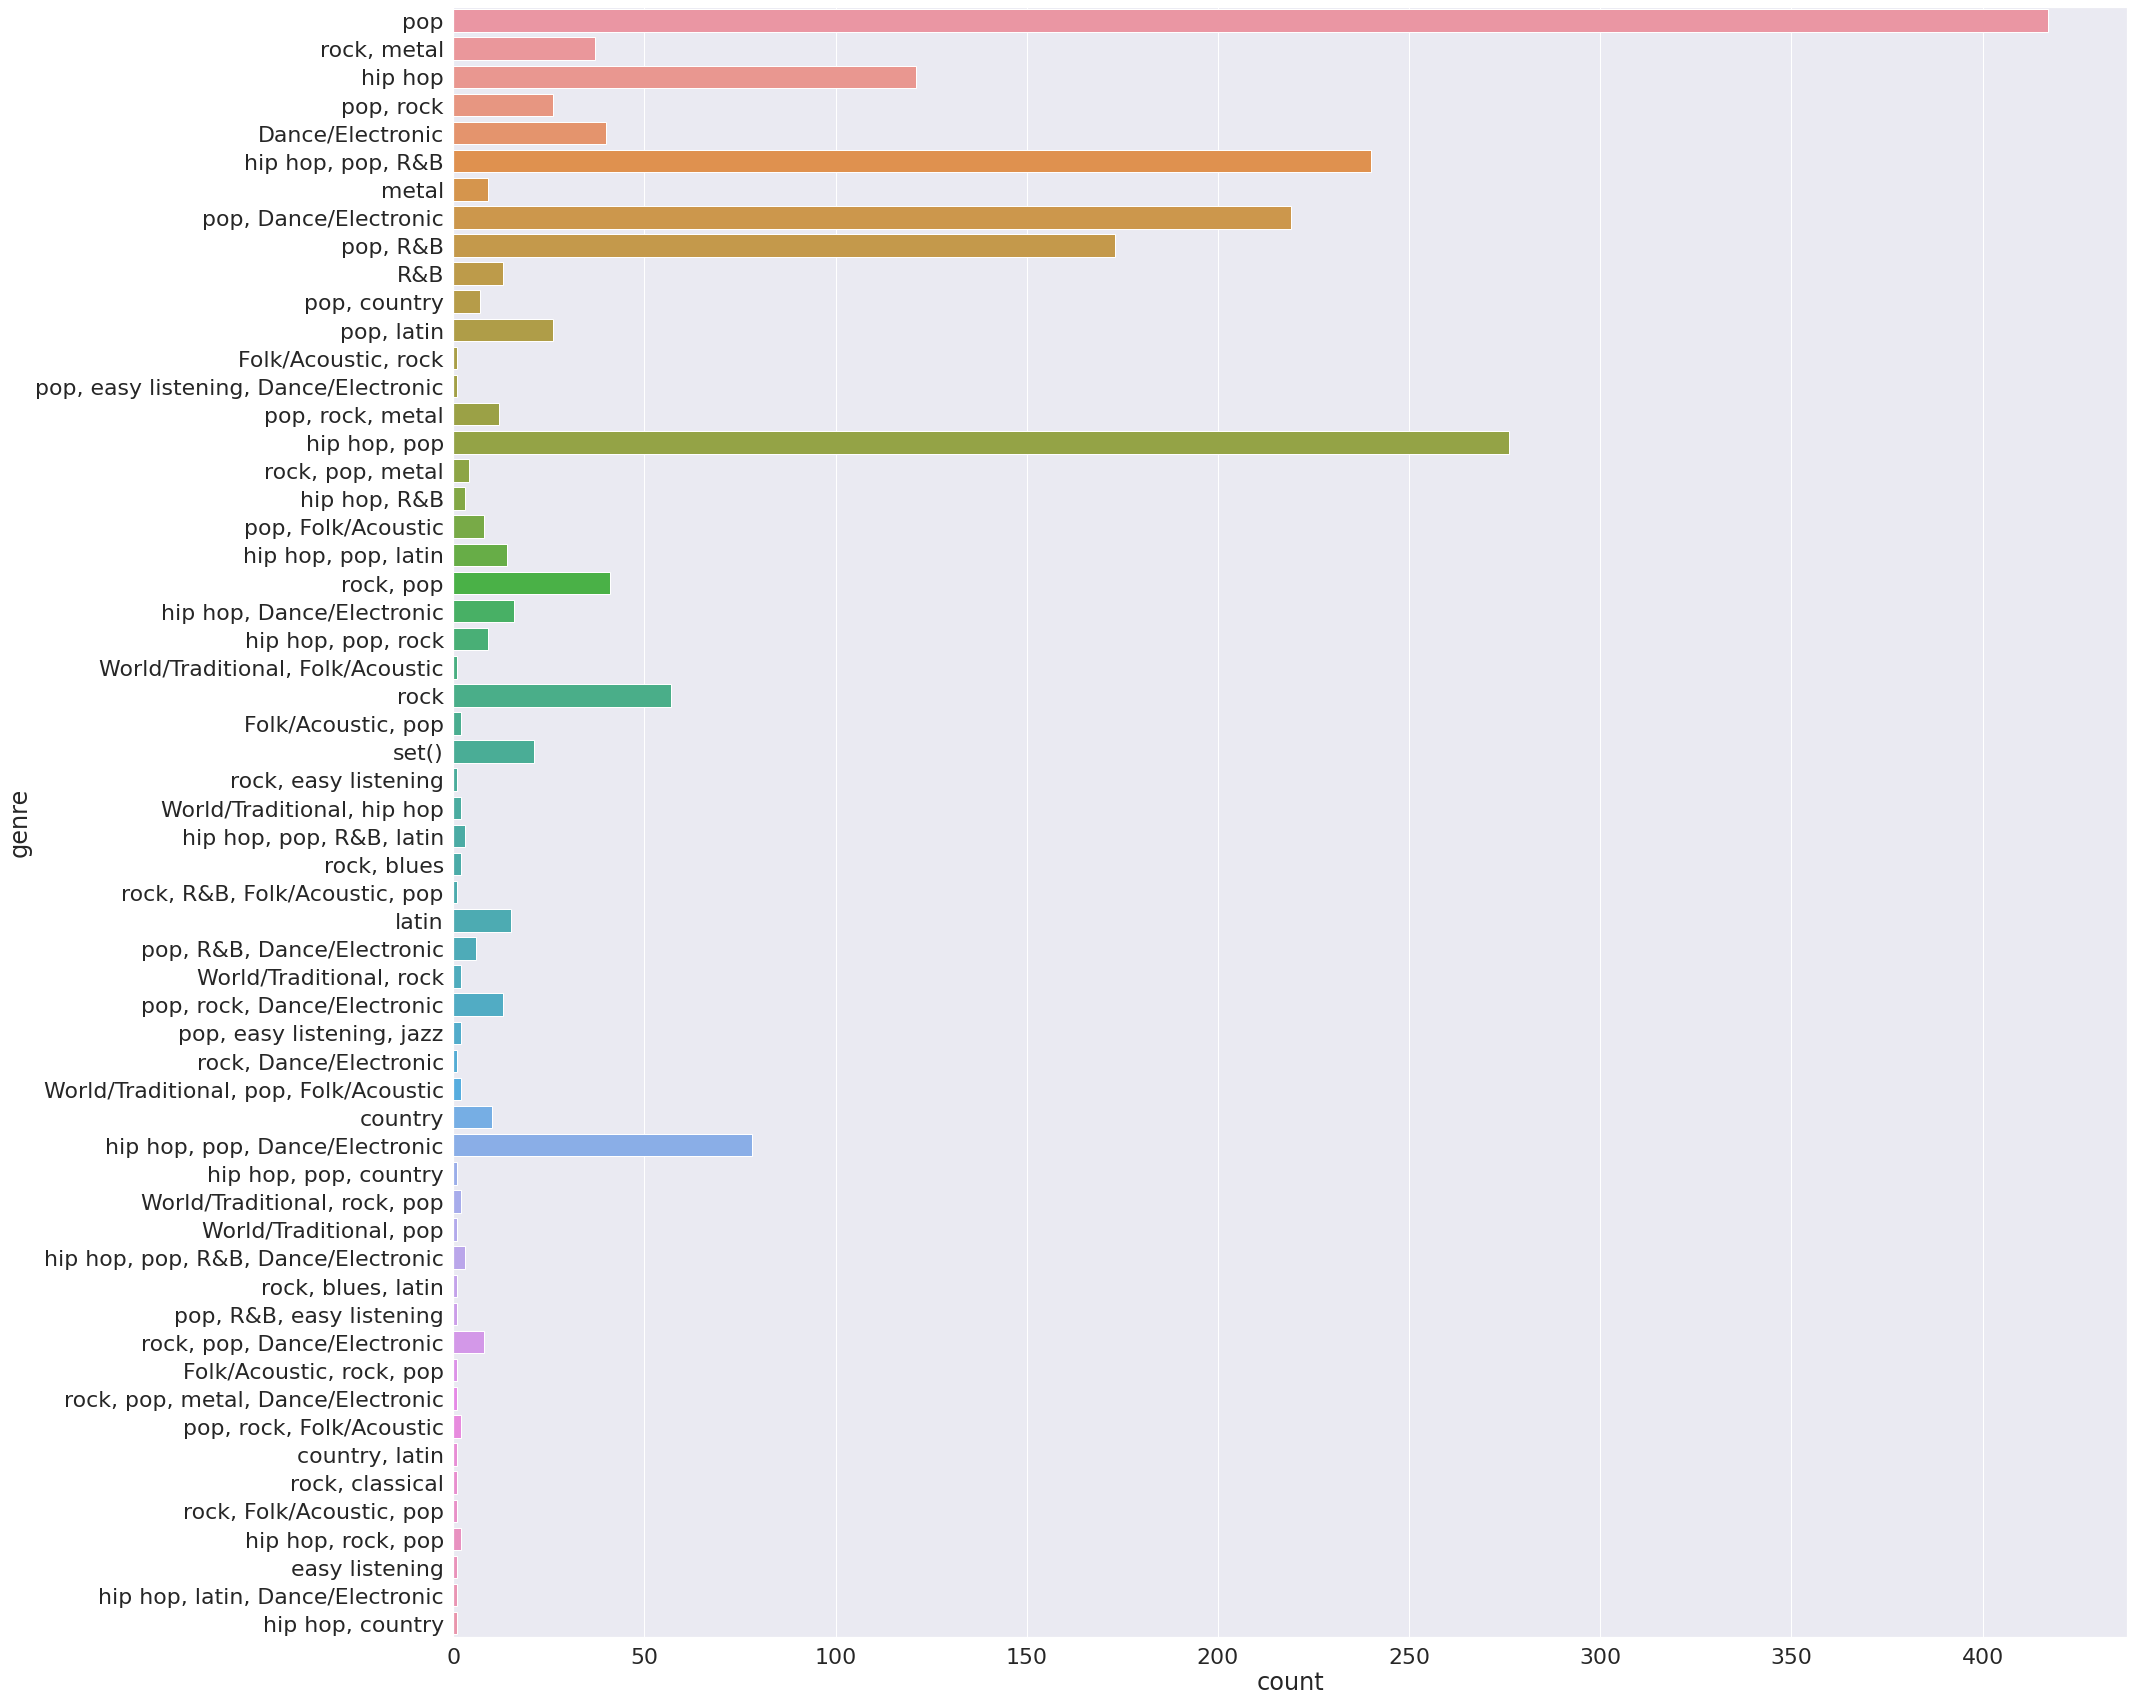

In [30]:
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(30,30))
sns.set(font_scale = 2)
sns.countplot(y='genre', data=df)
plt.show()

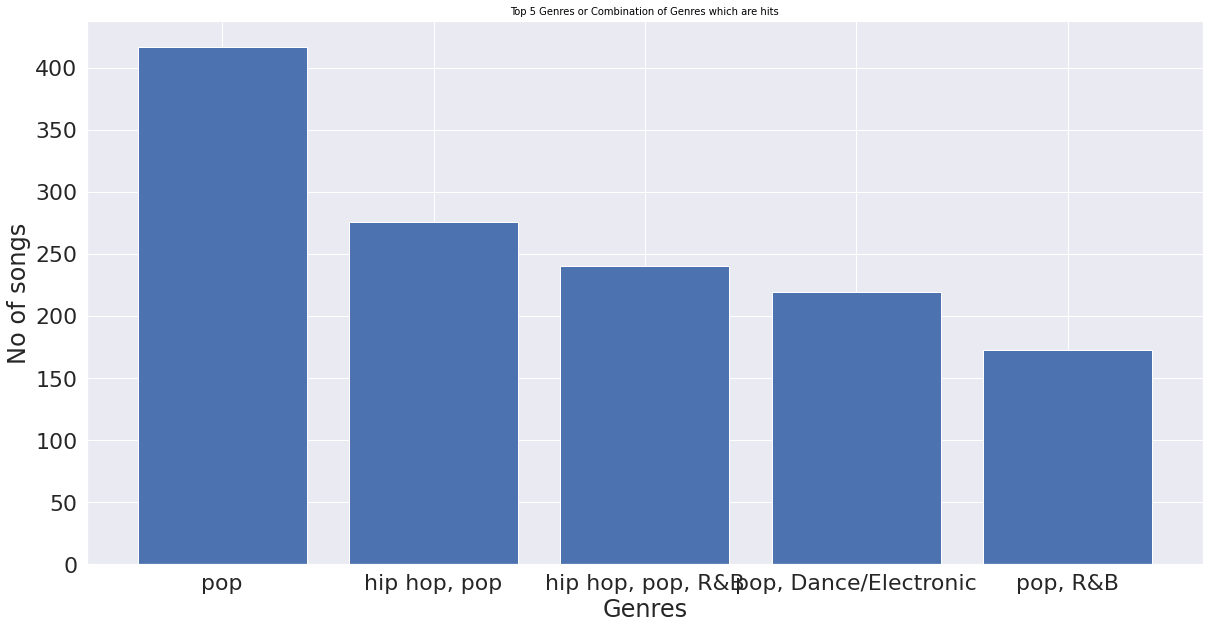

In [17]:
tp_genres=genre[:5]
tp_genres_names=genre[:5].index
fig = plt.figure(figsize = (20, 10))
plt.bar(tp_genres_names,tp_genres,color='b')
plt.xlabel("Genres")
plt.ylabel("No of songs")
plt.title('Top 5 Genres or Combination of Genres which are hits',color = 'black',fontsize = 10)
plt.show()

In [18]:
#converting the duration of songs from milliseconds to minutes for easier understanding
def ms_to_minsec(ms):
    sec = ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"

durations = df[['duration_ms','year']].groupby('year').mean().reset_index()
durations['duration_s'] = durations['duration_ms'] / 1000
durations['min:sec'] = durations['duration_ms'].apply(ms_to_minsec)


iplot(px.line(durations, 
        x='year', 
        y='duration_s',
        title='average song duration over the years',
        text='min:sec'
       ).update_xaxes(type='category').update_traces(textposition='top right'))


In [19]:
def time_convert(ms):
    sec=ms/1000
    return f"{int(sec//60)}:{int(sec%60)}"
song_len = df[['artist','song','duration_ms','year']]
max_dur = df['duration_ms'].max()
sl_max = song_len[df['duration_ms']==max_dur].T
print("Longest Duration:",sl_max)
print("\n")
min_dur = df['duration_ms'].min()
sl_min = song_len[df['duration_ms']==min_dur].T
print("Shortest Duration:",sl_min)
mean_dur = df['duration_ms'].mean()
print("\nAverage Duration:",time_convert(mean_dur))

Longest Duration:                           1381
artist       Justin Timberlake
song                   Mirrors
duration_ms             484146
year                      2013


Shortest Duration:                       1931
artist           Lil Nas X
song         Old Town Road
duration_ms         113000
year                  2019

Average Duration: 3:48


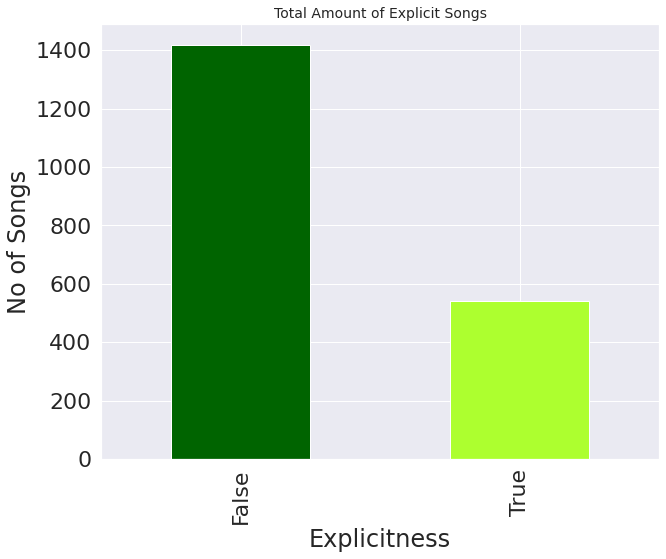

In [20]:
data=df['explicit'].value_counts()
plt.figure(figsize=(10,8))
plt.title("Total Amount of Explicit Songs",fontsize=14)
plt.ylabel("No of Songs")
plt.xlabel("Explicitness")
data.plot(kind='bar',color=['darkgreen', 'greenyellow'])

plt.show()


Pivot a level of the (necessarily hierarchical) index labels.

Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex).

Return an int representing the number of elements in this object.

Parameters
levelint, str, or list of these, default -1 (last level)
Level(s) of index to unstack, can pass level name.

fill_valueint, str or dict
Replace NaN with this value if the unstack produces missing values.

Returns
Series or DataFrame

Return the number of rows if Series. Otherwise return the number of rows times number of columns if DataFrame.

In [28]:
year_explicit = df.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()
year_explicit.rename(columns={False:'Clean', True: 'Explicit'}, inplace=True)

iplot(px.bar(year_explicit, 
       y=['Clean', 'Explicit'], 
       x='year',
       title='Explicit vs Clean distribution each year',
       color_discrete_sequence=['cornflowerblue', 'crimson']
      ).update_xaxes(type='category'))

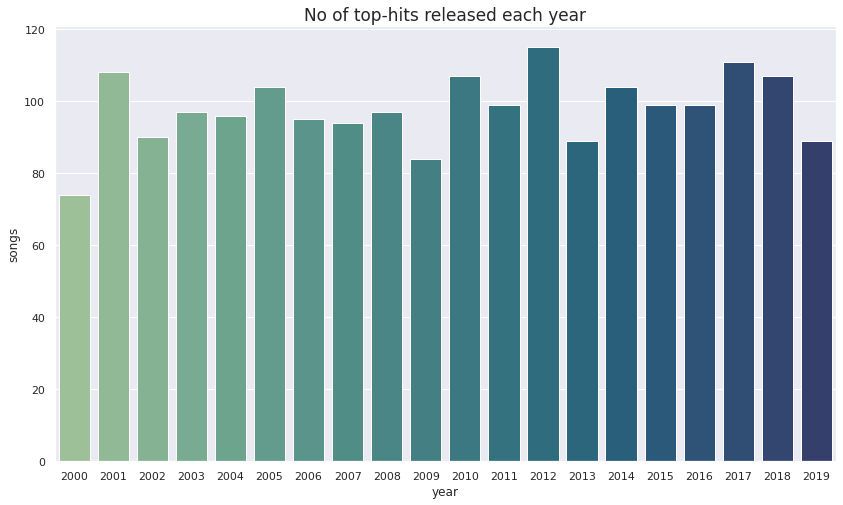

In [ ]:
songs_yr = df.year.value_counts().rename_axis('year').reset_index(name='songs') 
plt.figure(figsize=(14,8))
plt.title("No of top-hits released each year",fontsize=17)
c1 = sns.barplot(x="year",y="songs",data=songs_yr,palette="crest")
#c1.bar_label(c1.containers[0],size = 15)
plt.show()

In [ ]:
# Getting the most popular song
df.loc[df['popularity']== df['popularity'].max()]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


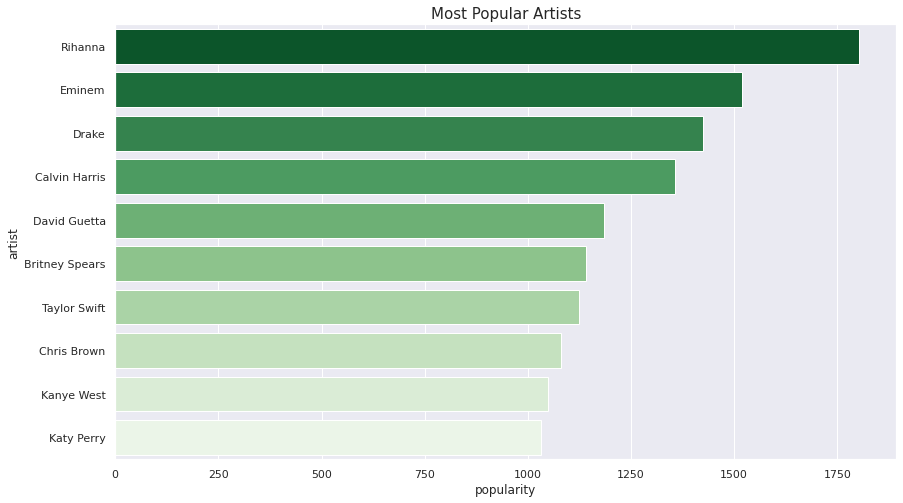

In [ ]:
pop_artist = df.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',ascending=False)
plt.figure(figsize=(14,8))
plt.title("Most Popular Artists",fontsize=15)
c1 = sns.barplot(x="popularity",y=pop_artist.index,data=pop_artist,palette="Greens_r")
#c1.bar_label(c1.containers[0],size = 15)
plt.show()

In [ ]:
# most danceable song
max_dance = df.loc[df['danceability']==df['danceability'].max()]
max_dance

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
714,Timbaland,Give It To Me,234026,True,2007,70,0.975,0.711,8,-3.904,1,0.0632,0.168,0.000552,0.0799,0.815,110.621,"hip hop, pop, R&B"


In [ ]:
# least danceable song
min_dance = df.loc[df['danceability']==df['danceability'].min()]
min_dance

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
573,Westlife,You Raise Me Up,241066,False,2005,1,0.129,0.358,10,-6.596,1,0.0314,0.631,0.0,0.0886,0.172,75.048,pop


In [33]:

from plotly.subplots import make_subplots

histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       x=histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       height=400, 
                       width=500,
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

In [27]:
 df.groupby(['year','explicit']).size().unstack(fill_value=0).reset_index()

explicit,year,False,True
0,2000,62,12
1,2001,85,23
2,2002,60,30
3,2003,74,23
4,2004,60,36
5,2005,75,29
6,2006,69,26
7,2007,72,22
8,2008,74,23
9,2009,61,23
